In [1]:
!pip install ucimlrepo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Wstęp
## Cel ćwiczenia
W tym notebooku głównym celem jest żeby poprawnie przeprowadzić "standardowe" ML flow i przypomnieć sobie/ popracować z biblotekami sklearn, numpy, pandas.
Zadanie będzie wymagało zrobienia Exploratory Data Analysis, a następnie na jej podstawie wykonania preprocessingu danych oraz puszczenie modelu.

### Ogólne informacje do zadania:
#### 1. Zbiór danych
czyli to na czym będziemy pracowac w tym zadaniu. Jest to zbiór [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing), na którym do wykonania jest zadanie z klasyfikacji tak jak opisane w repozytorium. Polecam skorzystać z `ucimlrepo` aby go zainstalować.



#### 2. EDA

czyli poznaj swoje dane, a przede wszystkim oceń ich jakość. Potraktuj ten etap jako upewnienie się, że to, co wejdzie do Twojego modelu, jest „czyste” i nie zawiera żadnych niespodziewanych wartości w poszczególnych kolumnach  takich, które w najlepszym przypadku zwróciłyby błąd, a w najgorszym doprowadziły do wytrenowania słabego modelu.
Pamiętaj: *Garbage in, garbage out.* Z pustego nawet Salomon nie naleje, nieważne jak bardzo będziemy dobierać hiperparametry.
Poniżej kilka pomocniczych pytań, które mogą naprowadzić, co należy sprawdzić i na co uważać na etapie EDA:

* czy dane załadowały się prawidłowo
* czy typy kolumn odpowiadają ich zawartości; czy potrzebujemy zmienić typ (np. wiek powinien być w `int`, a nie w typie „object”)
* czy mamy brakujące wartości w jakichś kolumnach- jeśli tak, to co z nimi robimy (usuwamy wiersze? kolumny? uzupełniamy brak?); jeśli uzupełniamy, to w jaki sposób, by było to optymalne. Istnieje kilka prostych metod (mediana, moda, średnia), ale w praktyce coraz częściej korzysta się z bardziej zaawansowanych imputerów (KNN Imputer, MICE itp.)
* czy brakująca wartość to zawsze Null/NaN? Czy dataset może używać innych znaczników braków (np. „?”, „missing”, „-999”)?
* czy wartości w kolumnach mają sens (ujemny wiek, BMI równe 0 itp.) i jak je traktować
* jak wyglądają rozkłady wartości kolumn, czy takich rozkładów się spodziewaliśmy
* czy mamy wartości odstające? Jeśli tak, to czy wynikają one z błędów (np. wzrost człowieka 18.0 m, źle wstawiony przecinek), czy mogą być prawdopodobne w prawdziwym świecie (np. miesięczny zarobek 500 tys. zł)? Co zrobić z takimi outlierami? Jak je wykryć (np. IQR, Z-score, Isolation Forest)?
* czy mamy kolumny wysoko skorelowane ze sobą; czy taka korelacja jest dla naszego modelu korzystna czy szkodliwa; jak ją zwizualizować (np. heatmapa); jak ją rozwiązać (np. usunięcie jednej z kolumn, PCA)
* czy format naszych danych jest „model-friendly”? Czy musimy zastosować jakieś kodowanie zmiennych (np. one-hot encoding, target encoding)?
* czy powinniśmy standaryzować / normalizować dane? Kiedy warto zastosować jedno, a kiedy drugie? Czy są przypadki, gdzie nie należy tego robić, a takie, gdzie jest to absolutnie konieczne?
* czy są kolumny, które na pewno usuniemy, bo nic nie wniosą do modelu albo mogą mu szkodzić (np. ID, kolumny z dużą liczbą unikalnych wartości bez znaczenia semantycznego)
* czy między naszymi danymi zachodzi jakaś istotna statystycznie zależność? Jeśli tak, to wykonajmy testy statystyczne, aby to potwierdzić (np. chi-kwadrat dla zmiennych kategorycznych, ANOVA, testy normalności, testy na homogeniczność wariancji)

Oczywiście nie musicie odpowiadać na wszystkie te pytania, bo nie każdy zbiór będzie wymagał rozwiązywania wszystkich problemów. Warto jednak pamiętać, że zbiór danych to fundament- jego zrozumienie może tylko pomóc w zaprojektowaniu dobrego modelu.

#### 3. Modelowanie

czyli należy wykorzystać ładnie przygotowane dane do zbudowania modelu. Wiadomo, że istnieją modele, które często zapewniają wysokie metryki już „z natury”, np. XGBoost. Warto jednak wziąć pod uwagę, że:

* nie ma co strzelać z armaty do komara- nie bierz XGBoosta, jeśli problem sensownie rozwiązuje regresja logistyczna
* im bardziej interpretowalny model, tym lepiej- zarówno przy dalszym rozwijaniu, jak i przy próbie wdrażania go w systemach produkcyjnych
* przy mniejszych zbiorach trenowanie trwa szybko, więc warto przetestować różne typy modeli i różne konfiguracje hiperparametrów
* wyciek wiedzy (*data leakage*) to jedno z największych ryzyk- kluczowe jest upewnienie się, że żadna informacja z przyszłości (np. ze zbioru testowego, albo z kolumn pochodnych) nie trafi do części treningowej
* w większości modeli mamy co najmniej kilka hiperparametrów, które mogą znacząco wpłynąć na jakość predykcji; powinniśmy je przetestować i dobrać tak, by model osiągał jak najlepsze wyniki
* najbezpieczniej jest używać cross-walidacji- i to na niej dobierać hiperparametry
* obliczenie wielu metryk nie zaszkodzi, natomiast musimy jasno zdefiniować, która metryka jest najważniejsza z perspektywy celu zadania (accuracy? recall? precision? AUC? MAE?)




## **KROKI DO WYKONANIA ZADANIA- minimalny zakres prac (EDA + Modelowanie)**

To zadanie jest wyjątkowo otwarte i można je wykonać na wiele sposobów, w zależności od kreatywności i podejścia. Natomiast istnieje **pewne minimum**, na którym na pewno trzeba się skupić, aby zadanie zostało zaliczone


**EDA (Exploratory Data Analysis)**

* sprawdzenie brakujących danych oraz- jeśli będzie potrzeba- ich uzupełnienie odpowiednią metodą
* sprawdzenie wartości odstających i decyzja, co z nimi zrobić (usunąć, poprawić, zostawić)
* sprawdzenie rozkładów **zmiennej decyzyjnej** oraz najważniejszych zmiennych wejściowych
* zbadanie, jak dokładnie zformatować dane, aby model mógł je poprawnie przyjąć (np. typy danych, kodowanie zmiennych, standaryzacja)
* zbadanie zależności między zmiennymi (np. korelacje, testy statystyczne, analiza współzależności)
* zadbanie o warstwę wizualną tam, gdzie jest to możliwe i pomocne (wykresy, heatmapy, histogramy, boxploty itp.)
* krótki wniosek po EDA- co możemy powiedzieć o danych, co w nich odkryliśmy, jakie są istotne problemy i na co należy uważać podczas modelowania


**MODELOWANIE**

* wybranie minimum **3 różnych modeli** reprezentujących różne rodziny (np. regresja logistyczna, drzewa, modele ensemble, SVM, sieć neuronowa)
* dla każdego modelu sprawdzenie minimum **2 hiperparametrów** (dobieranych na zbiorze walidacyjnym)
* dobór hiperparametrów wykonany za pomocą mechanizmu **cross-walidacji**
* sprawdzenie ostatecznych wyników na **zbiorze testowym**, po zakończeniu strojenia hiperparametrów
* użycie techniki SHAP na dowolnym wytrenowanym modelu w celu zbadania wyjaśnialności- wybrać minimum jeden przykład poprawnej predykcji oraz jeden przykład błędnej, a następnie je zbadać.
* czytelna prezentacja wyników i metryk (tabela porównawcza, wykresy, krótki komentarz)
* wnioski i konkluzje z eksperymentu- który model działa najlepiej, dlaczego, jakie są ograniczenia, co można poprawić

**WAŻNE UWAGI DO ZADANIA**

* Pamiętajcie, że analizę zbioru wykonujemy na **całym dostępnym zbiorze danych**. **Natomiast** kiedy przechodzimy do transformacji zbioru danych (standaryzacja, uzupełnianie brakujących danych itp.), wykonujemy ją **wyłącznie na podstawie rozkładu zbioru *trenującego***.
  Przykładowo: parametry używane do standaryzacji kolumn obliczamy na zbiorze trenującym, a następnie stosujemy je do zbioru walidacyjnego i testowego. W przeciwnym przypadku dochodzi do **wycieku wiedzy** (więcej informacji w materiałach dodatkowych).

* Biblioteka `sklearn` jest dobrze przystosowana do takiego scenariusza dzięki wykorzystaniu tzw. obiektów **Pipeline**. Użycie ich nie jest wymagane, ale może ułatwić pisanie kodu oraz pomóc w uniknięciu wycieku wiedzy.

* Do wykonania zadania powinny wystarczyć standardowe biblioteki pythonowe, wymienione poniżej. Oczywiście nie trzeba się do nich ograniczać — można korzystać również z innych:

  * **sklearn** – podstawowa biblioteka do ML w Pythonie. Posiada prosty i intuicyjny interfejs i zawiera większość potrzebnych operacji.
  * **pandas** – do operacji na danych tabelarycznych.
  * **matplotlib / seaborn** – do wizualizacji.
  * **numpy** – do obliczeń i transformacji matematycznych (większość kluczowych bibliotek opiera się na NumPy).
  * **statistics** – operacje statystyczne.


Dodatkowe materiały:
- [modele w sklearnie](https://scikit-learn.org/stable/supervised_learning.html)
- [jeden z tutorialów do EDA](https://medium.com/data-science/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6)
- [co to wyciek danych](https://www.ibm.com/think/topics/data-leakage-machine-learning)
- [niezbalansowane dane](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)
- [wyjaśnialność za pomocą SHAP-a](https://shap.readthedocs.io/en/latest/)
- [brakujące wartości](https://medium.com/@ajayverma23/data-imputation-a-comprehensive-guide-to-handling-missing-values-b5c7d11c3488)
- [wizualizacja wielowymiarowych danych w 2D](https://medium.com/@laakhanbukkawar/pca-vs-t-sne-vs-umap-visualizing-the-invisible-in-your-data-92cb2baebdbb)
- [wartości odstające](https://www.geeksforgeeks.org/data-analysis/what-is-outlier-detection/)
- [cross validacja](https://scikit-learn.org/stable/modules/cross_validation.html)
- [pipelines w sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
- [OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- cała dokumentacja sklerana

In [2]:

from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)



X = bank_marketing.data.features
y = bank_marketing.data.targets

print(bank_marketing.metadata)

print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
import pandas as pd


bank_marketing_df = pd.concat([X, y], axis=1)

bank_marketing_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


Na początku usunę kategorię duration, day_of_week i education. Edukacja nie definiuje czyjegoś zainteresowania ofertą, ktoś mógł po złej edukacji zostać menedżerem i na odwrót, więc nie ma ona znaczenia. duration zdradza nam y i w momencie przewidywania jest nieznany. Day_of_week nic nam zbytnio nie mówi, ważniejszy jest miesiąc. Previous i pdays nie mają znaczenia

In [4]:
bank_marketing_df = bank_marketing_df.drop(['duration','day_of_week','education','contact'],axis=1)

In [5]:
def get_percentage_missing(df, axis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu
  """
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

In [6]:

missing_data = get_percentage_missing(bank_marketing_df, axis=0)
missing_data

,0
job,0.64
poutcome,81.75


Dla poutcome dodam zmienną unknown, a dla contact użyję znanej zmiennej unknown

In [7]:
bank_marketing_df['poutcome'] = bank_marketing_df['poutcome'].fillna('unknown')

In [8]:
def plot_numeric_histogram(df, column_name):
    """
    Plots a histogram for the specified column in the DataFrame,
    and adds vertical lines for the mean and median.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    Returns:
        None. Displays the histogram.
    """

    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [9]:
def plot_categorical_column(df, column_name):
    counts = df[column_name].value_counts()

    plt.figure(figsize=(16, 4))
    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'admin.'),
  Text(6, 0, 'services'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student')])

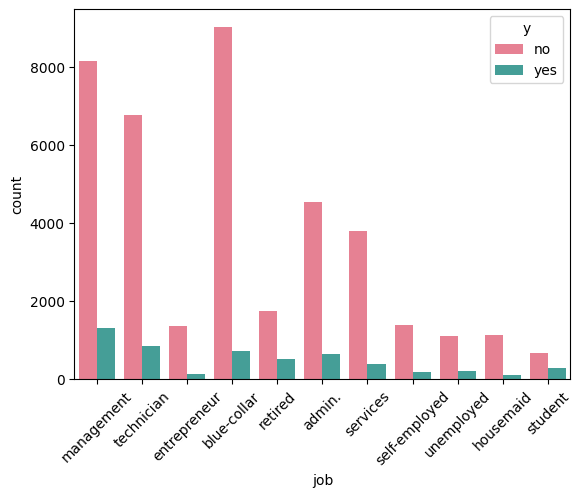

In [10]:
sns.countplot(bank_marketing_df, x = 'job', hue = 'y', palette = "husl")
plt.xticks(rotation=45)

Jak widać na wykresie większość osób nie bierze u nas lokaty w kampanii :((((
Następnie dla tej analizy zrobię wykres w % zamiast dla każdej kategorii.

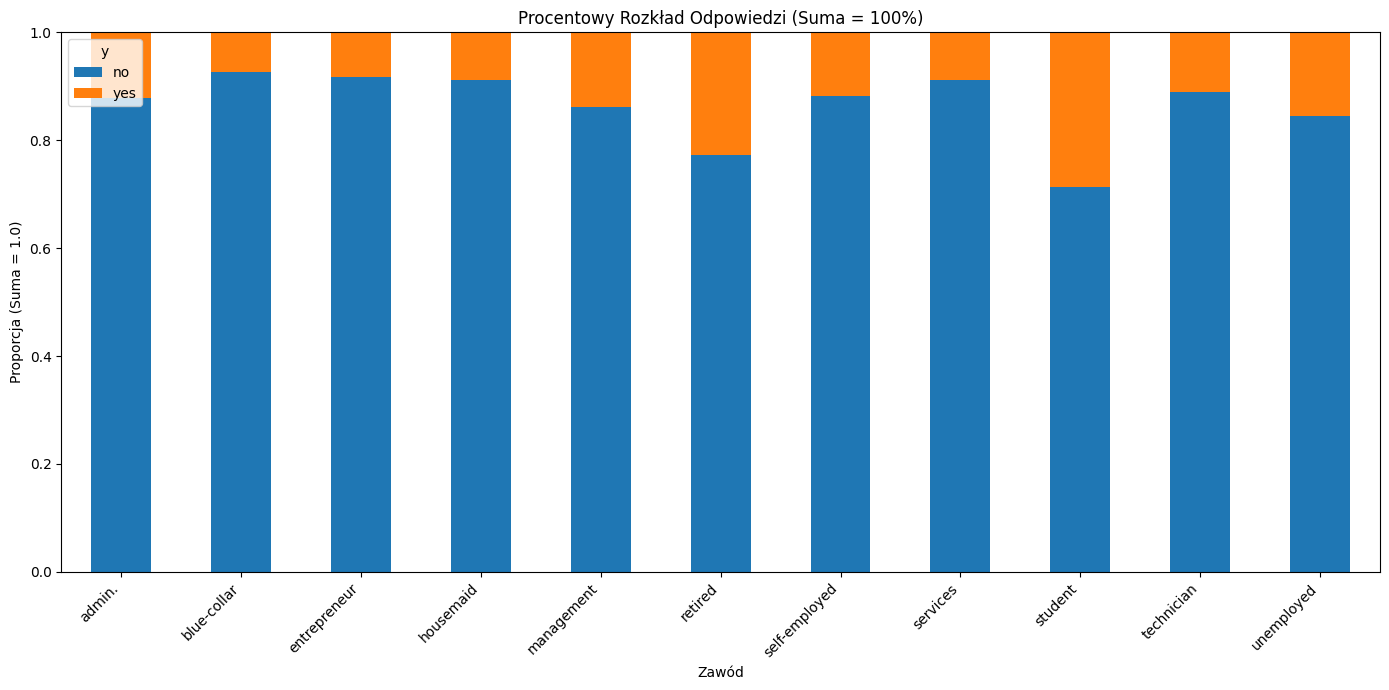

In [11]:
ZMIENNA_KATEGORYCZNA = 'job'
ZMIENNA_DOCELOWA = 'y'

proporcje_zawodow = pd.crosstab(
    bank_marketing_df[ZMIENNA_KATEGORYCZNA],
    bank_marketing_df[ZMIENNA_DOCELOWA],
    normalize='index'
)

plt.figure(figsize=(14, 7))
ax = proporcje_zawodow.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    ax=plt.gca()
)

plt.title('Procentowy Rozkład Odpowiedzi (Suma = 100%)')
plt.ylabel('Proporcja (Suma = 1.0)')
plt.xlabel('Zawód')
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 1.0)

plt.legend(title=ZMIENNA_DOCELOWA, loc='upper left')
plt.tight_layout()
plt.show()

Jak widać najwięcej studentów % bierze lokatę.

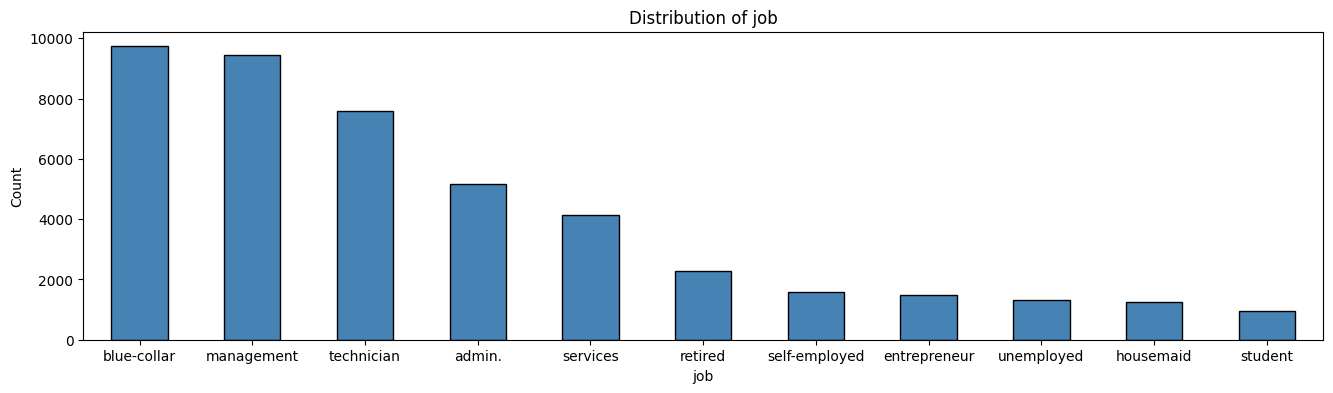

In [12]:
plot_categorical_column(bank_marketing_df,'job')

In [13]:
def plot_barplot(df,x,y):
  plt.figure(figsize=(12, 6))
  sns.barplot(x=x, y=y, data=df)
  plt.title("Wykres "+x+" od "+y)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout(
  )
  plt.show()

In [14]:

def plot_correlation_matrix(df):
    """
    Plots a heatmap showing the correlation matrix for numeric columns in the DataFrame.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing numeric data.
    Returns:
        None. Displays the correlation heatmap.
    """
    # compute correlation matrix only for numeric columns
    corr = df.corr(numeric_only=True)

    # fmt=".2f" rounds the number to 0.01
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [15]:
missing_data = get_percentage_missing(bank_marketing_df, axis=0)
missing_data

,0
job,0.64


In [16]:
bank_marketing_df.head()

,age,job,marital,default,balance,housing,loan,month,campaign,pdays,previous,poutcome,y
0,58,management,married,no,2143,yes,no,may,1,-1,0,unknown,no
1,44,technician,single,no,29,yes,no,may,1,-1,0,unknown,no
2,33,entrepreneur,married,no,2,yes,yes,may,1,-1,0,unknown,no
3,47,blue-collar,married,no,1506,yes,no,may,1,-1,0,unknown,no
4,33,NaN,single,no,1,no,no,may,1,-1,0,unknown,no


Następnie poprawiam data types

In [17]:
bank_marketing_df=bank_marketing_df.convert_dtypes()
bank_marketing_df.head()

,age,job,marital,default,balance,housing,loan,month,campaign,pdays,previous,poutcome,y
0,58,management,married,no,2143,yes,no,may,1,-1,0,unknown,no
1,44,technician,single,no,29,yes,no,may,1,-1,0,unknown,no
2,33,entrepreneur,married,no,2,yes,yes,may,1,-1,0,unknown,no
3,47,blue-collar,married,no,1506,yes,no,may,1,-1,0,unknown,no
4,33,<NA>,single,no,1,no,no,may,1,-1,0,unknown,no


In [18]:
bank_marketing_df.dtypes

,0
age,Int64
job,string[python]
marital,string[python]
default,string[python]
balance,Int64
housing,string[python]
loan,string[python]
month,string[python]
campaign,Int64
pdays,Int64


In [19]:
kolumny_binarne = ['loan', 'housing', 'default','y']

bank_marketing_df[kolumny_binarne] = bank_marketing_df[kolumny_binarne].replace({
    'yes': '1',
    'no': '0'
})


bank_marketing_df['is_single'] = bank_marketing_df['marital'].apply(lambda x: 1 if x in ['single', 'divorced'] else 0)

bank_marketing_df=bank_marketing_df.drop('marital',axis=1)


bank_marketing_df[kolumny_binarne] = bank_marketing_df[kolumny_binarne].astype('int64')
bank_marketing_df['hasLoan'] = bank_marketing_df.apply(lambda x: 1 if x['loan'] > 0 or x['housing'] > 0 else 0, axis=1)
bank_marketing_df=bank_marketing_df.drop(['loan','housing'],axis=1)

In [20]:
monthMap= {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
bank_marketing_df['month'] = bank_marketing_df['month'].map(monthMap)

In [21]:
bank_marketing_df['poutcome'].unique()

<StringArray>
['unknown', 'failure', 'other', 'success']
Length: 4, dtype: string

In [22]:
mapowanie_poutcome = {
    'failure': -1,
    'other': 0,
    'success': 1,
    'unknown': 0
}
bank_marketing_df['poutcome'] = bank_marketing_df['poutcome'].map(mapowanie_poutcome)
bank_marketing_df['poutcome'] = bank_marketing_df['poutcome'].astype(pd.Int64Dtype())

In [23]:
def plot_correlation_matrix(df):

    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [24]:
bank_marketing_df.head()

,age,job,default,balance,month,campaign,pdays,previous,poutcome,y,is_single,hasLoan
0,58,management,0,2143,5,1,-1,0,0,0,0,1
1,44,technician,0,29,5,1,-1,0,0,0,1,1
2,33,entrepreneur,0,2,5,1,-1,0,0,0,0,1
3,47,blue-collar,0,1506,5,1,-1,0,0,0,0,1
4,33,<NA>,0,1,5,1,-1,0,0,0,1,0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    bank_marketing_df.drop('y', axis=1),
    bank_marketing_df['y'],
    test_size=0.2,
    random_state=42
)

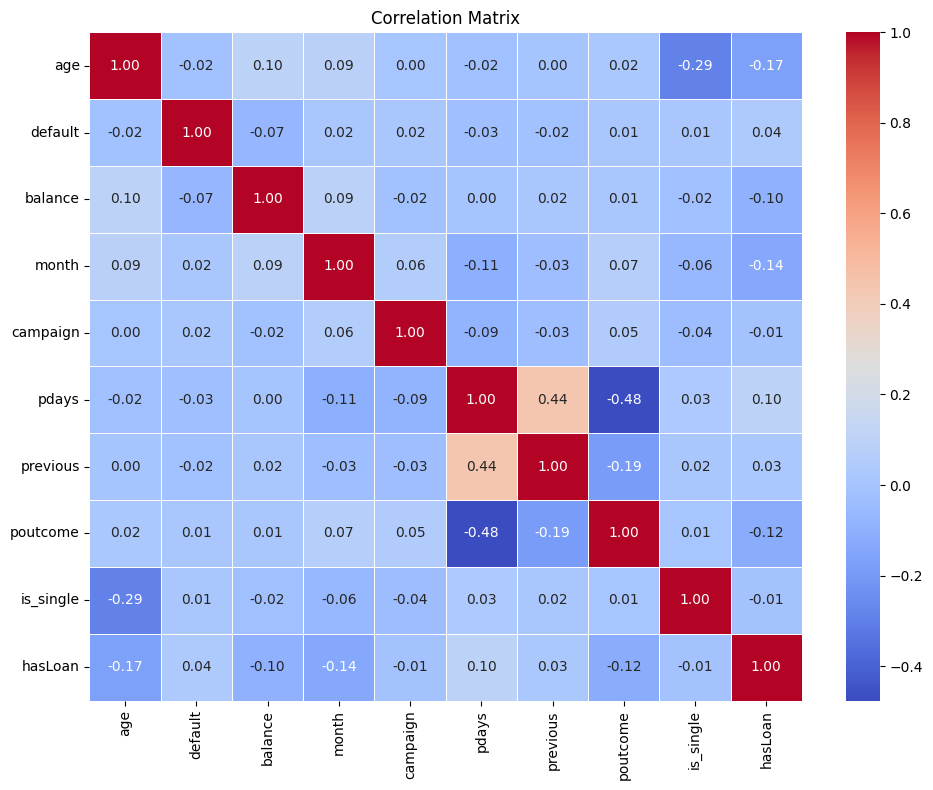

In [26]:
plot_correlation_matrix(X_train)

Jak widać pdays, poutcome i previous są bardzo mocno skorelowane, aby się tego pozbyć zamiast previous i pdays dam zmienną P/F beenContacted

In [27]:
X_train['beenContacted'] = X_train.apply(lambda x: 1 if x['pdays'] >= 0 or x['previous'] > 0 else 0, axis=1)
X_test['beenContacted'] = X_test.apply(lambda x: 1 if x['pdays'] >= 0 or x['previous'] > 0 else 0, axis=1)

X_train = X_train.drop(['pdays', 'previous'], axis=1)
X_test = X_test.drop(['pdays', 'previous'], axis=1)

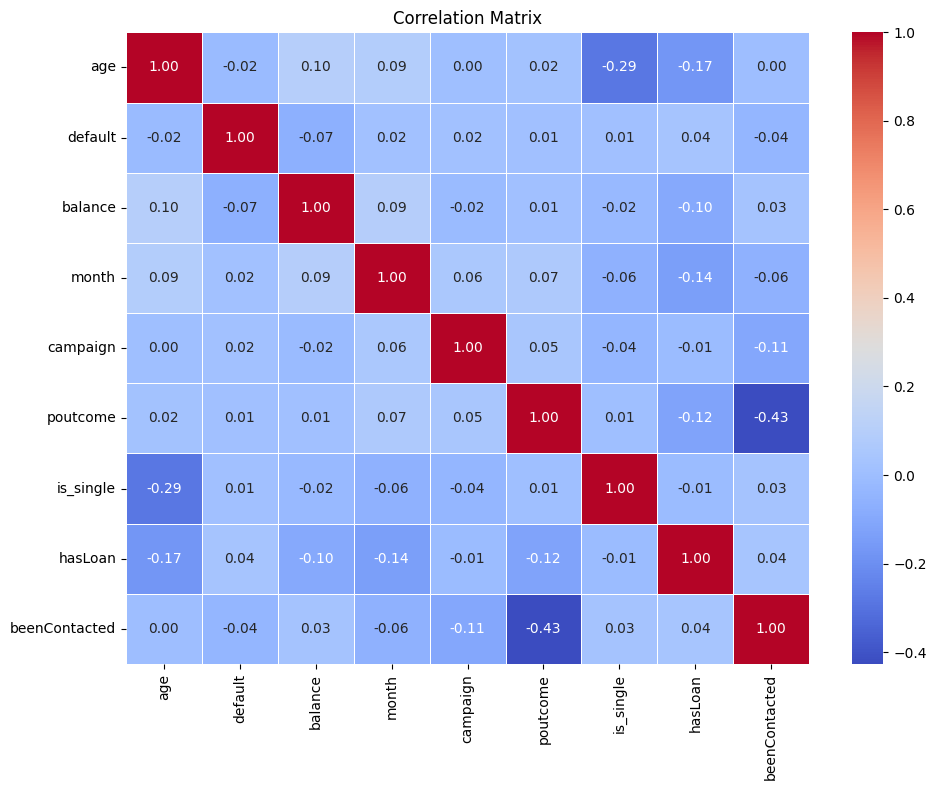

In [28]:
plot_correlation_matrix(X_train)

Uzupełnienie jobs i OHE

In [29]:
X_train.head()

,age,job,default,balance,month,campaign,poutcome,is_single,hasLoan,beenContacted
3344,41,blue-collar,0,849,5,1,0,0,1,0
17965,49,technician,0,1415,7,2,0,0,1,0
18299,42,admin.,0,3842,7,4,0,0,0,0
10221,37,management,0,-119,6,11,0,1,1,0
32192,56,blue-collar,0,3498,4,2,0,0,0,0


In [30]:
from sklearn.preprocessing import OneHotEncoder

dostepne_zawody = bank_marketing_df['job'].dropna().unique()

X_train['job'] = X_train['job'].apply(
    lambda x: np.random.choice(dostepne_zawody) if pd.isna(x) else x
)
X_test['job'] = X_test['job'].apply(
    lambda x: np.random.choice(dostepne_zawody) if pd.isna(x) else x
)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[['job']])
def apply_ohe_and_join(df, encoder):
    job_encoded = encoder.transform(df[['job']])

    feature_names = encoder.get_feature_names_out(['job'])

    job_df = pd.DataFrame(job_encoded, columns=feature_names, index=df.index)

    df = pd.concat([df.drop('job', axis=1), job_df], axis=1)
    return df
X_train = apply_ohe_and_join(X_train, encoder)
X_test = apply_ohe_and_join(X_test, encoder)

In [31]:
X_train=X_train.astype(int)
X_test=X_test.astype(int)

In [32]:
X_train.dtypes

,0
age,int64
default,int64
balance,int64
month,int64
campaign,int64
poutcome,int64
is_single,int64
hasLoan,int64
beenContacted,int64
job_admin.,int64


Analiza outlierów

In [33]:
def boxplot(df, column_name):

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen')
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()

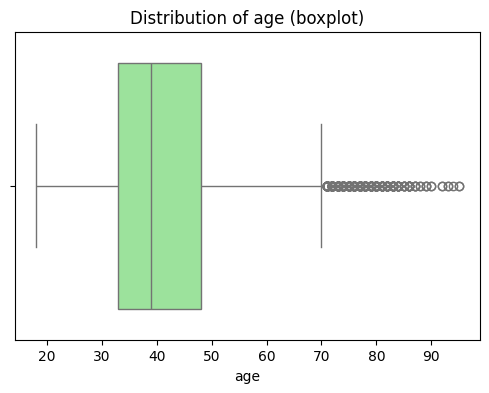

In [34]:
boxplot(bank_marketing_df, 'age')

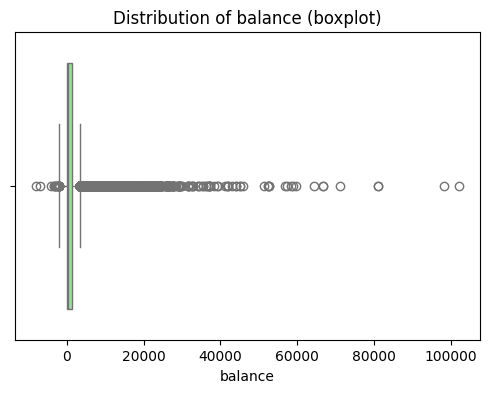

In [35]:
boxplot(bank_marketing_df, 'balance')

Jak widać część osób jest bardzo bogata.

Niestety czas mnie trochę goni, więc na razie zrobię 1 model. Postaram się do czwartku 20 dodać parę modeli i dokończyć EDA.

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report, mean_squared_error, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import ValidationCurveDisplay


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

mlp_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('resample', RandomOverSampler(random_state=42)),
    ('mlp', MLPClassifier(max_iter=500, random_state=42))
])

param_dist_mlp = {
    'mlp__alpha': np.logspace(-5, 2, 50),
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__learning_rate_init': [0.001, 0.01]
}

rs_mlp = RandomizedSearchCV(
    mlp_pipeline,
    param_distributions=param_dist_mlp,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    random_state=42,
    scoring='f1_weighted'
)

rs_mlp.fit(X_train, y_train)
print(f"Najlepsze dla MLP: {rs_mlp.best_params_}")

Najlepsze dla MLP: {'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__alpha': np.float64(0.3727593720314938)}


In [38]:
y_pred_mlp = rs_mlp.best_estimator_.predict(X_test)
print("Raport klasyfikacji dla najlepszego MLP:")
print(classification_report(y_test, y_pred_mlp))

print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred_mlp))

Raport klasyfikacji dla najlepszego MLP:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7952
           1       0.32      0.53      0.40      1091

    accuracy                           0.81      9043
   macro avg       0.62      0.69      0.64      9043
weighted avg       0.86      0.81      0.83      9043

Macierz pomyłek:
[[6719 1233]
 [ 514  577]]


In [39]:
from sklearn.ensemble import RandomForestClassifier

param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rs_rf = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist_rf,
    n_iter=15,
    cv=3,
    n_jobs=-1,
    random_state=42,
    scoring='f1_weighted'
)

rs_rf.fit(X_train, y_train)
print(f"Najlepsze dla RF: {rs_rf.best_params_}")

Najlepsze dla RF: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 30}


In [40]:
final_best_RF=rs_rf.best_estimator_
y_pred_rf = final_best_RF.predict(X_test)
print("Raport klasyfikacji dla najlepszej Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred_rf))

Raport klasyfikacji dla najlepszej Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7952
           1       0.46      0.37      0.41      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.66      0.67      9043
weighted avg       0.86      0.87      0.87      9043

Macierz pomyłek:
[[7484  468]
 [ 687  404]]


# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('resample', RandomOverSampler(random_state=42)),
    ('knn', KNeighborsClassifier())
])

param_dist_knn = {
    'knn__n_neighbors': [3, 5, 7, 11, 15],
    'knn__weights': ['uniform', 'distance']
}

rs_knn = RandomizedSearchCV(
    knn_pipeline,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    scoring='f1_weighted',
    random_state=42
)

rs_knn.fit(X_train, y_train)

y_pred_knn = rs_knn.best_estimator_.predict(X_test)
print("Raport dla KNN:")
print(classification_report(y_test, y_pred_knn))

print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred_knn))

Raport dla KNN:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      7952
           1       0.25      0.37      0.30      1091

    accuracy                           0.79      9043
   macro avg       0.58      0.61      0.59      9043
weighted avg       0.83      0.79      0.81      9043

Macierz pomyłek:
[[6774 1178]
 [ 689  402]]


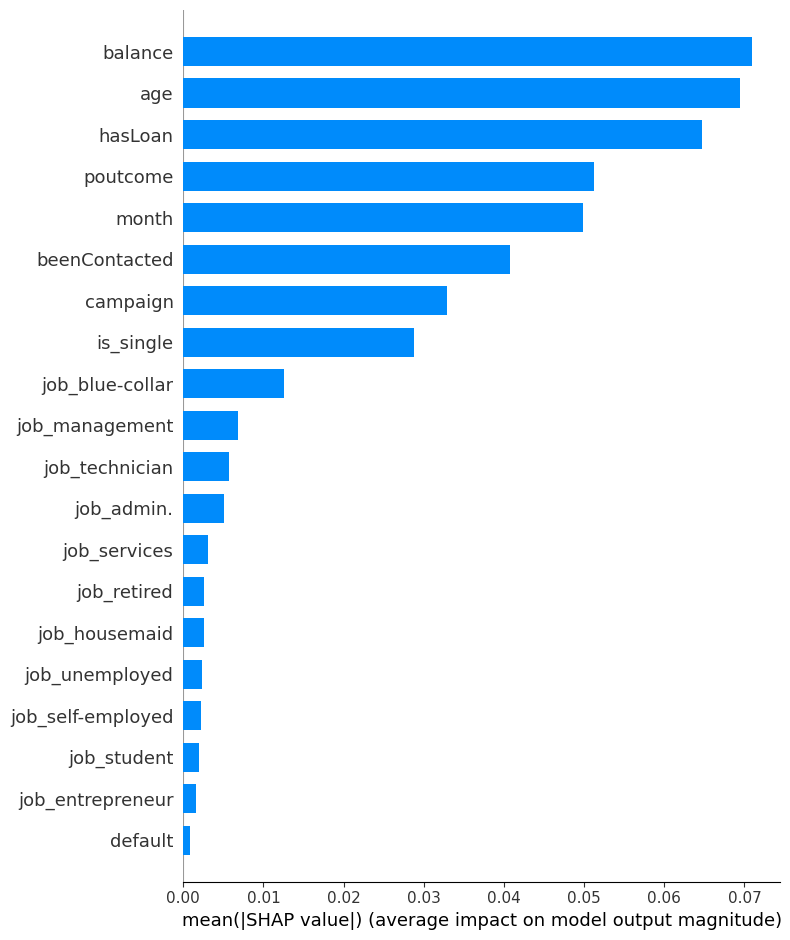

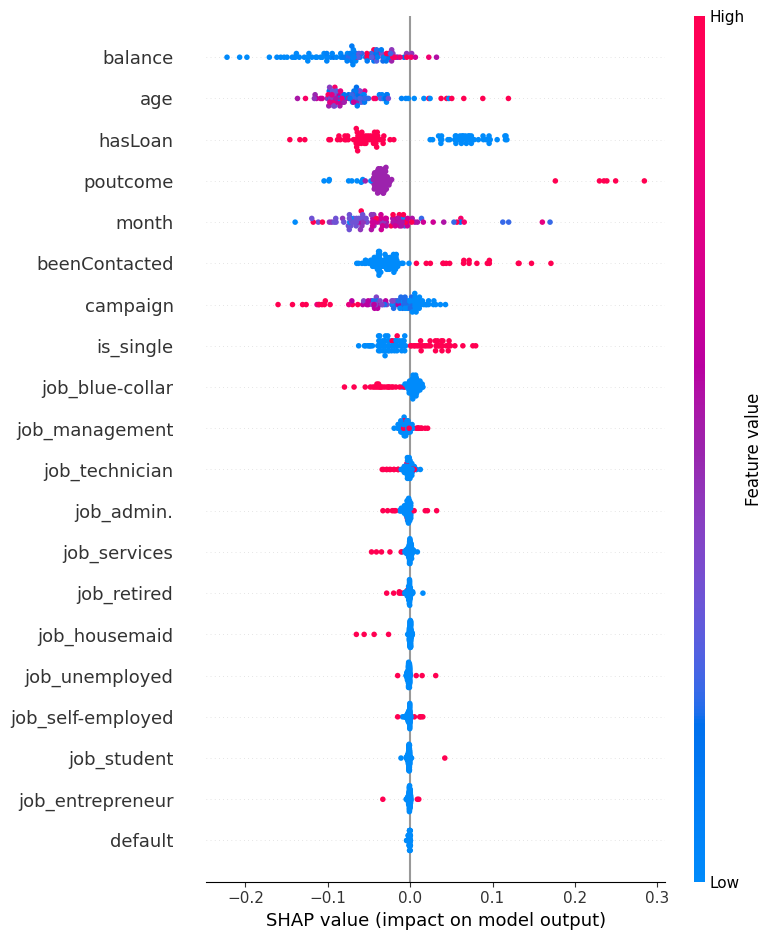

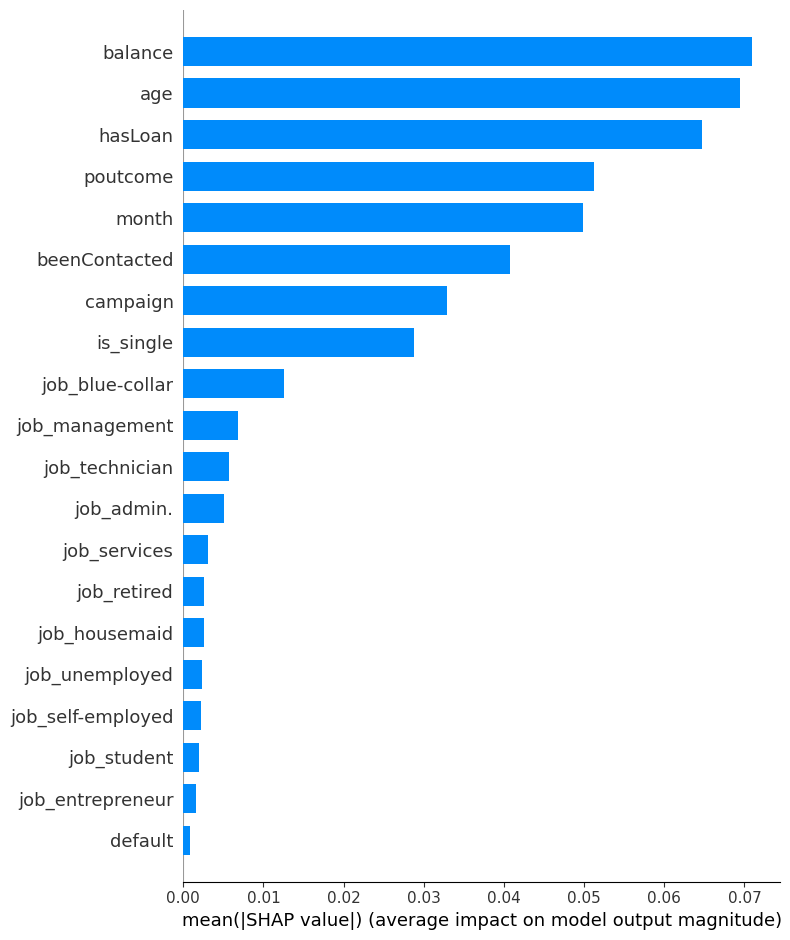

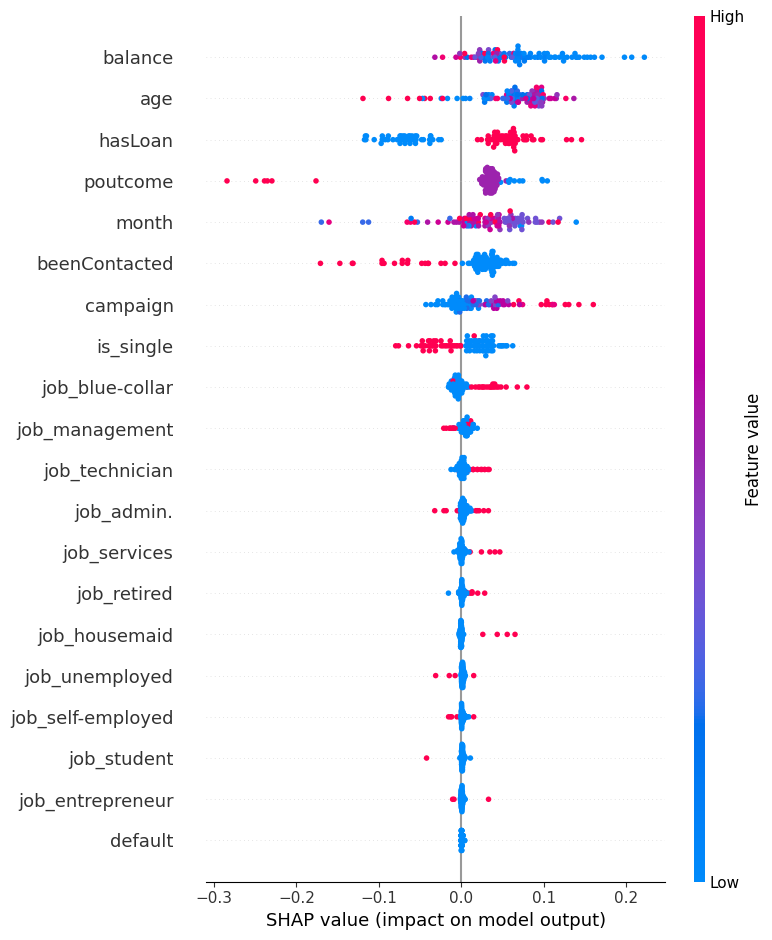

In [42]:
import shap

X_test_sample = X_test.sample(n=100, random_state=42)


explainer = shap.TreeExplainer(rs_rf.best_estimator_)

shap_values = explainer.shap_values(X_test_sample)


shap.summary_plot(shap_values[:, :, 1], X_test_sample, plot_type="bar", title="SHAP values for Class 1 (Yes)")
shap.summary_plot(shap_values[:, :, 1], X_test_sample, title="SHAP values for Class 1 (Yes)")
shap.summary_plot(shap_values[:, :, 0], X_test_sample, plot_type="bar", title="SHAP values for Class 0 (No)")
shap.summary_plot(shap_values[:, :, 0], X_test_sample, title="SHAP values for Class 0 (No)")